# EDA

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #for plotting data
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#for colab
#import io
#from google.colab import files
#data_to_load = files.upload()

## Reading csv files

In [ ]:
#for jupyter and colab if files have been uploaded
five = pd.read_csv("2015.csv")
six = pd.read_csv("2016.csv")
seven = pd.read_csv("2017.csv")
eight = pd.read_csv("2018.csv")
nine = pd.read_csv("2019.csv")

#for colab
#five = pd.read_csv(io.BytesIO(data_to_load['2015.csv']))
#six = pd.read_csv(io.BytesIO(data_to_load['2016.csv']))
#seven = pd.read_csv(io.BytesIO(data_to_load['2017.csv']))
#eight = pd.read_csv(io.BytesIO(data_to_load['2018.csv']))
#nine = pd.read_csv(io.BytesIO(data_to_load['2019.csv']))

## Merging and Cleaning Data

In [ ]:
# Run this cell only once

five.sort_values("Country", inplace=True, ignore_index=True) # Sort data alphabetically by country
five = five.add_suffix(" 2015") # Append year to column names

total = five.copy()
total.rename(columns={"Country 2015": "Country"}, inplace=True)
total.rename(columns={"Region 2015": "Region"}, inplace=True)
total

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error 2015,Economy (GDP per Capita) 2015,Family 2015,Health (Life Expectancy) 2015,Freedom 2015,Trust (Government Corruption) 2015,Generosity 2015,Dystopia Residual 2015
0,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
154,Vietnam,Southeastern Asia,75,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
155,Yemen,Middle East and Northern Africa,136,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313
156,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430


Here we appended "2015" to each of the column names in the 2015 dataframe. We will be merging the other years' data sets into `total`, also with their respective years appended to their statistics. The index will be countries, as that stays constant.

In [ ]:
# Run this cell only once

# After analyzing the datasets, we found that out of all the countries, Hong Kong and Somaliland Region were both renamed.
for i in total.index:
  if total["Country"][i] == "Somaliland region":
    total.at[i, "Country"] = "Somaliland Region"
six.sort_values("Country", inplace=True, ignore_index=True) # Sort data alphabetically by country
six = six.add_suffix(" 2016") # Append year to column names
total = pd.merge(total, six, left_on="Country", right_on="Country 2016", how="outer") # Merge country columns, keeping column name of total dataframe

print("Countries added in 2016:")
for i in total.index: # Loops through each country for NaN values that may occur from new countries merged from the 2016 dataset
  if total["Country"][i] != total["Country"][i]:
    total.at[i, "Country"] = total["Country 2016"][i] # Sets NaN values to proper country names
    total.at[i, "Region"] = total["Region 2016"][i] # Sets NaN values to proper region names
    print(total["Country"][i])

total.drop(["Country 2016", "Region 2016"], axis=1, inplace=True) # Drop duplicate country and region columns

for i in seven.index:
  if seven["Country"][i] == "Hong Kong S.A.R., China":
    seven.at[i, "Country"] = "Hong Kong"
seven.sort_values("Country", inplace=True, ignore_index=True) # Sort data alphabetically by country
seven = seven.add_suffix(" 2017") # Append year to column names
total = pd.merge(total, seven, left_on="Country", right_on="Country 2017", how="outer") # Merge country columns, keeping column name of total dataframe

print("\n")
print("Countries added in 2017:")
for i in total.index: # Loops through each country for NaN values that may occur from new countries merged from the 2017 dataset
  if total["Country"][i] != total["Country"][i]:
    total.at[i, "Country"] = total["Country 2017"][i] # Sets NaN values to proper country names
    print(total["Country"][i])

total.drop(["Country 2017"], axis=1, inplace=True) # Drop duplicate country column

eight.sort_values("Country or region", inplace=True, ignore_index=True) # Sort data alphabetically by country
eight = eight.add_suffix(" 2018") # Append year to column names
total = pd.merge(total, eight, left_on="Country", right_on="Country or region 2018", how="outer") # Merge country columns, keeping column name of total dataframe

print("\n")
print("Countries added in 2018:")
for i in total.index: # Loops through each country for NaN values that may occur from new countries merged from the 2018 dataset
  if total["Country"][i] != total["Country"][i]:
    total.at[i, "Country"] = total["Country or region 2018"][i] # Sets NaN values to proper country names
    print(total["Country"][i])

total.drop(["Country or region 2018"], axis=1, inplace=True) # Drop duplicate country or region column

nine.sort_values("Country or region", inplace=True, ignore_index=True) # Sort data alphabetically by country
nine = nine.add_suffix(" 2019") # Append year to column names

# Drop duplicate country columns
total.sort_values("Country", inplace=True, ignore_index=True)
print("\n")
print("Total Countries:")
for i in total.index:
  print(total["Country"][i])

Countries added in 2016:
Belize
Namibia
Puerto Rico
Somalia
South Sudan


Countries added in 2017:
Taiwan Province of China


Countries added in 2018:
Northern Cyprus
Trinidad & Tobago


Total Countries:
Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Gabon
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Mali
Malta


In [ ]:
total

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error 2015,Economy (GDP per Capita) 2015,Family 2015,Health (Life Expectancy) 2015,Freedom 2015,Trust (Government Corruption) 2015,Generosity 2015,Dystopia Residual 2015,Happiness Rank 2016,Happiness Score 2016,Lower Confidence Interval 2016,Upper Confidence Interval 2016,Economy (GDP per Capita) 2016,Family 2016,Health (Life Expectancy) 2016,Freedom 2016,Trust (Government Corruption) 2016,Generosity 2016,Dystopia Residual 2016,Happiness.Rank 2017,Happiness.Score 2017,Whisker.high 2017,Whisker.low 2017,Economy..GDP.per.Capita. 2017,Family 2017,Health..Life.Expectancy. 2017,Freedom 2017,Generosity 2017,Trust..Government.Corruption. 2017,Dystopia.Residual 2017,Overall rank 2018,Score 2018,GDP per capita 2018,Social support 2018,Healthy life expectancy 2018,Freedom to make life choices 2018,Generosity 2018,Perceptions of corruption 2018
0,Afghanistan,Southern Asia,153.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,154.0,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,141.0,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,Albania,Central and Eastern Europe,95.0,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,109.0,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,109.0,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,112.0,4.586,0.916,0.817,0.790,0.419,0.149,0.032
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,38.0,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,53.0,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,84.0,5.295,0.979,1.154,0.687,0.077,0.055,0.135
3,Angola,Sub-Saharan Africa,137.0,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,141.0,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,140.0,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,142.0,3.795,0.730,1.125,0.269,0.000,0.079,0.061
4,Argentina,Latin America and Caribbean,30.0,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,26.0,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,24.0,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,29.0,6.388,1.073,1.468,0.744,0.570,0.062,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,Latin America and Caribbean,23.0,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131,44.0,6.084,5.973,6.195,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468,82.0,5.250,5.370032,5.129968,1.128431,1.431338,0.617144,0.153997,0.065020,0.064491,1.789464,102.0,4.806,0.996,1.469,0.657,0.133,0.056,0.052
162,Vietnam,Southeastern Asia,75.0,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173,96.0,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180,94.0,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319,95.0,5.103,0.715,1.365,0.702,0.618,0.177,0.079
163,Yemen,Middle East and Northern Africa,136.0,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313,147.0,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295,146.0,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,152.0,3.355,0.442,1.073,0.343,0.244,0.083,0.064
164,Zambia,Sub-Saharan Africa,85.0,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430,106.0,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991,116.0,4.514,4.644106,4.383894,0.636407,1.003187,0.257836,0.461603,0.249580,0.07821

### Procedure

After analyzing the datasets, we found that out of all the countries, Hong Kong and Somaliland Region were the only countries that appeared in two unique instances, as they were renamed. We unified these two countries by renaming all instances to the most recent instance: Hong Kong and Somaliland Region respectively. We then sorted each dataframe (corresponding to each year) alphabetically by country name in-place, while keeping the indices intact. We then appended each column in each dataframe with its respective year.

We created a `total` dataframe populating it with data from the 2015 dataframe. We then performed outer merges on `total` and each of the other datasets in the train set (2015-2018). If any countries were newly added, we transferred the country to the general "Country" column and then dropped the duplicate country and region columns.

The `total` dataframe now contains the statistics for the entire train dataset with columns labeled by year.

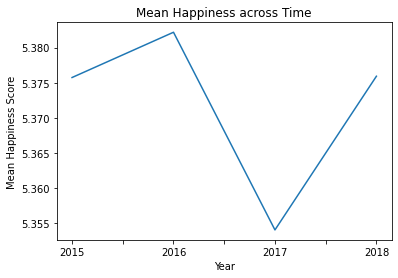

In [ ]:
mean_happiness_score = pd.Series([total['Happiness Score 2015'].mean(), total['Happiness Score 2016'].mean(), total['Happiness.Score 2017'].mean(), total['Score 2018'].mean()])
mean_happiness_score.index=['2015','2016','2017','2018']
mean_happiness_score.plot()
plt.title('Mean Happiness across Time')
plt.xlabel('Year')
plt.ylabel('Mean Happiness Score')
plt.show()

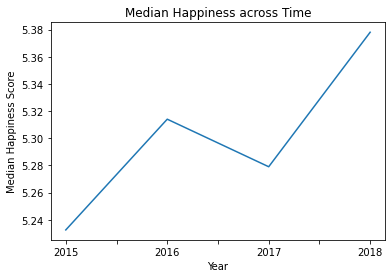

In [ ]:

median_happiness_score = pd.Series([total['Happiness Score 2015'].median(), total['Happiness Score 2016'].median(), total['Happiness.Score 2017'].median(), total['Score 2018'].median()])
median_happiness_score.index=['2015','2016','2017','2018']
median_happiness_score.plot()
plt.title('Median Happiness across Time')
plt.xlabel('Year')
plt.ylabel('Median Happiness Score')
plt.show()

The mean and median generally increased over time. This implies countries overall grew happier from 2015 to 2018.
Interestingly, the mean and median happiness score dropped in 2017, then rose in 2018.


In [ ]:
rank_df = total[['Country', 'Happiness Rank 2015', 'Happiness Rank 2016', 'Happiness.Rank 2017', 'Overall rank 2018']]
#rank_df = pd.merge(rank_df, nine[['Country or region 2019', 'Overall rank 2019']], how='left', left_on='Country', right_on='Country or region 2019')
#rank_df = rank_df.drop(columns=['Country or region 2019']) #after merging on correct countries dispose of redudant country column
#rank_df = rank_df.assign(std_dev = rank_df[['Happiness Rank 2015','Happiness Rank 2016','Happiness.Rank 2017','Overall rank 2018','Overall rank 2019']].std(axis=1))
rank_df = rank_df[['Happiness Rank 2015', 'Happiness Rank 2016', 'Happiness.Rank 2017', 'Overall rank 2018']].interpolate(axis = 1) #interpolating NaN data values
rank_df.index = total['Country']
rank_df = rank_df.assign(gmoney = abs(rank_df['Happiness Rank 2015'] - rank_df['Happiness Rank 2016']) +
                        abs(rank_df['Happiness Rank 2016'] - rank_df['Happiness.Rank 2017']) +
                        abs(rank_df['Happiness.Rank 2017'] - rank_df['Overall rank 2018']))
rank_df = rank_df.assign(rankrise = rank_df['Happiness Rank 2015'] - rank_df['Overall rank 2018'])
rank_df

,Happiness Rank 2015,Happiness Rank 2016,Happiness.Rank 2017,Overall rank 2018,gmoney,rankrise
Country,,,,,,
Afghanistan,153.0,154.0,141.0,145.0,18.0,8.0
Albania,95.0,109.0,109.0,112.0,17.0,-17.0
Algeria,68.0,38.0,53.0,84.0,76.0,-16.0
Angola,137.0,141.0,140.0,142.0,7.0,-5.0
Argentina,30.0,26.0,24.0,29.0,11.0,1.0
...,...,...,...,...,...,...
Venezuela,23.0,44.0,82.0,102.0,79.0,-79.0
Vietnam,75.0,96.0,94.0,95.0,24.0,-20.0
Yemen,136.0,147.0,146.0,152.0,18.0,-16.0


We created a new dataframe here, containing every country's Happiness Rank from 2015 to 2018. The stability of a country's rank was calculated as the summation of the difference of each year's rank. A smaller summation equated to less variation in a country's ranking, meaning a more stable country. 

Finding the countries who raised in rank was done by subtracting the rank in 2015 by 2018's rank, in each country. Countries with a positive difference meant a rise in rank, a negative difference meant a drop in rank.

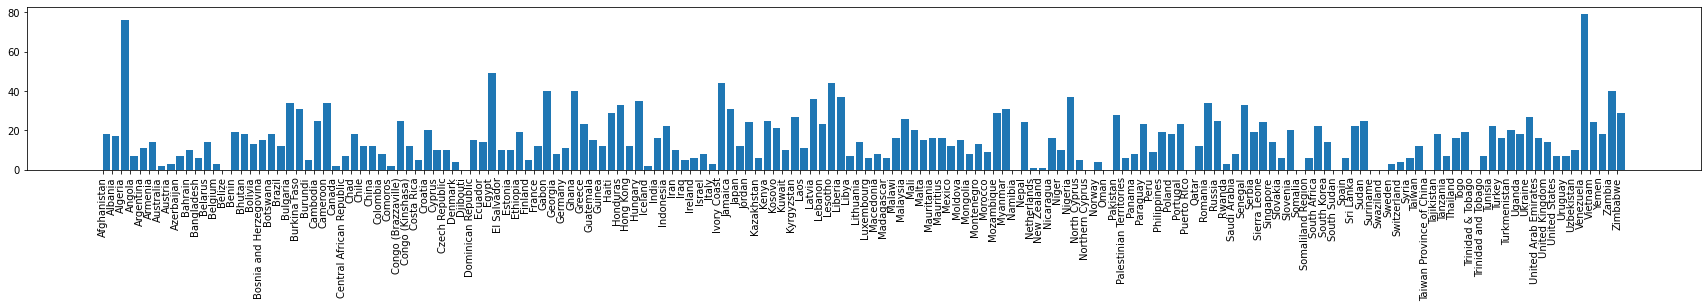

In [ ]:
plt.figure(figsize=(30, 3))
plt.xticks(rotation='vertical')
plt.bar(rank_df.index, rank_df['gmoney'], align='edge', width=0.8)
plt.show()

The most stable countries in terms of rankings included The Netherlands, New Zealand, Iceland, Australia, Belgium, and Rwanda. Algeria and Venezuela were by far the least stable countries, followed by countries such as Gabon, Ivory Coast, and Lesotho.

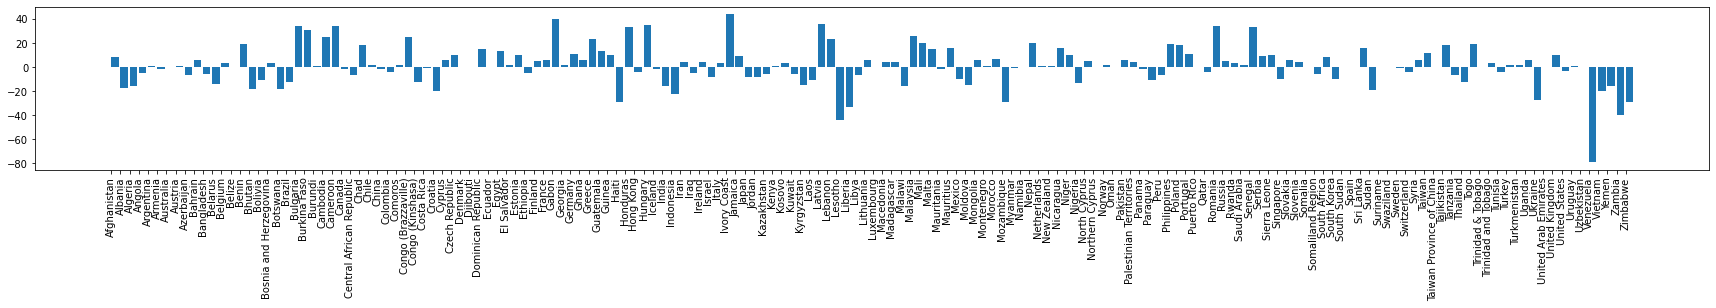

In [ ]:
plt.figure(figsize=(30, 3))
plt.xticks(rotation='vertical')
plt.bar(rank_df.index, rank_df['rankrise'], align='edge', width=0.8)
plt.show()

The countries that rose significantly from 2015 to 2018 include Bulgaria, Cameroon, Gabon, Ivory Coast, and Latvia. Echoing its stability, Venezuela also experienced an extreme drop in rankings, alongside Lesotho and Libera. Lesotho was also among the least stable countries from 2015 to 2018.


## Pearson Correlation Coefficient Between Happiness Score and Other Features
### Which features contribute to happiness?

### Features: Economy (GDP per Capita), Social Support (2018), Health (Life Expectancy), Freedom, Perceptions of Corruption (2018), Generosity

We omitted standard error as it is only present for the 2015 dataset. We also omitted confidence intervals, whiskers, and dystopia residual as they do not appear in later years. From appearances, it appears the Family feature (2015-2017) is replaced by Social Support in 2018 as well as Trust (Government Corruption) by Perceptions of Corruption. As such, we only use 2018 values for determining correlation between happiness score and social support/perceptions of corruption. For reference, we also calculate the correlation coefficient for just 2018 for the other features as well.

In [ ]:
# Setting up happiness score numpy array and series for Pearson correlation coefficient
happiness_cols = ["Happiness Score 2015", "Happiness Score 2016", "Happiness.Score 2017", "Score 2018"]
happiness_arr = total[happiness_cols].transpose().to_numpy().flatten() # happiness_arr = 1-D numpy array with all of the happiness scores sorted by alphabetical order by country name for every year
happiness_series = pd.Series(happiness_arr) # happiness_series = Pandas series with all of the happiness scores sorted by alphabetical order by country name for every year
print("Happiness Score Series for All Years")
print(happiness_series)
happiness_arr_2018 = total["Score 2018"] # happiness arr for only 2018
happiness_series_2018 = pd.Series(happiness_arr_2018) # happiness series for only 2018
print("Happiness Score Series for 2018")
print(happiness_series_2018)

Happiness Score Series for All Years
0      3.575
1      4.959
2      5.605
3      4.033
4      6.574
       ...  
659    4.806
660    5.103
661    3.355
662    4.377
663    3.692
Length: 664, dtype: float64
Happiness Score Series for 2018
0      3.632
1      4.586
2      5.295
3      3.795
4      6.388
       ...  
161    4.806
162    5.103
163    3.355
164    4.377
165    3.692
Name: Score 2018, Length: 166, dtype: float64


In [ ]:
# Calculating Pearson correlation coefficient between happiness score and GDP per capita
economy_cols = ["Economy (GDP per Capita) 2015", "Economy (GDP per Capita) 2016", "Economy..GDP.per.Capita. 2017", "GDP per capita 2018"]
economy_arr = total[economy_cols].transpose().to_numpy().flatten() # economy_arr = 1-D numpy array with all of the GDP per capita sorted by alphabetical order by country name for every year
economy_series = pd.Series(economy_arr) # economy_series = Pandas series with all of the GDP per capita sorted by alphabetical order by country name for every year

r1 = happiness_series.corr(economy_series, method="pearson") # Pandas correlation ignores NaN pairs
print("Pearson correlation coefficient between happiness score and GDP per capita: ", r1)

Pearson correlation coefficient between happiness score and GDP per capita:  0.7885723398716481


In [ ]:
economy_arr_2018 = total["GDP per capita 2018"] # economy_arr_2018 = 1-D numpy array with all of the GDp per capita sorted by alphabetical order by country name for 2018
economy_series_2018 = pd.Series(economy_arr_2018) # economy_series_2018 = Pandas series with all of the GDP per capita sorted by alphabetical order by country name for 2018

r1_2018 = happiness_series_2018.corr(economy_series_2018, method="pearson")
print("Pearson correlation coefficient between happiness score and GDP per capita (2018 only): ", r1_2018)

Pearson correlation coefficient between happiness score and GDP per capita (2018 only):  0.8021239467301905


In [ ]:
# Calculating Pearson correlation coefficient between happiness score and social support (2018 only)
social_support_arr = total["Social support 2018"].to_numpy() # social_support_arr = 1-D numpy array with all of the values of social support sorted by alphabetical order by country name for 2018
social_support_series = pd.Series(social_support_arr) # social_support_series = Pandas series with all of the values of social support sorted by alphabetical order by country name for 2018

r2 = happiness_series_2018.corr(social_support_series, method="pearson")
print("Pearson correlation coefficient between happiness score and social support: ", r2)

Pearson correlation coefficient between happiness score and social support:  0.7457601649725747


In [ ]:
# Calculating Pearson correlation coefficient between happiness score and health (life expectancy)
health_cols = ["Health (Life Expectancy) 2015", "Health (Life Expectancy) 2016", "Health..Life.Expectancy. 2017", "Healthy life expectancy 2018"]
health_arr = total[health_cols].transpose().to_numpy().flatten() # health_arr = 1-D numpy array with all of the life expectancies sorted by alphabetical order by country name for every year
health_series = pd.Series(health_arr) # health_series = Pandas series with all of the life expectancies sorted by alphabetical order by country name for every year

r3 = happiness_series.corr(health_series, method="pearson")
print("Pearson correlation coefficient between happiness score and health (life expectancy): ", r3)

Pearson correlation coefficient between happiness score and health (life expectancy):  0.7545623066546295


In [ ]:
health_arr_2018 = total["Healthy life expectancy 2018"] # health_arr_2018 = 1-D numpy array with all of the life expectancies sorted by alphabetical order by country name for 2018
health_series_2018 = pd.Series(health_arr_2018) # health_series_2018 = Pandas series with all of the life expectancies sorted by alphabetical order by country name for 2018

r3_2018 = happiness_series_2018.corr(health_series_2018, method="pearson")
print("Pearson correlation coefficient between happiness score and health (life expectancy) (2018 only): ", r3_2018)

Pearson correlation coefficient between happiness score and health (life expectancy) (2018 only):  0.7758136033302462


In [ ]:
# Calculating Pearson correlation coefficient between happiness score and freedom
freedom_cols = ["Freedom 2015", "Freedom 2016", "Freedom 2017", "Freedom to make life choices 2018"]
freedom_arr = total[freedom_cols].transpose().to_numpy().flatten() # freedom_arr = 1-D numpy array with all of the values of freedom sorted by alphabetical order by country name for every year
freedom_series = pd.Series(freedom_arr) # freedom_series = Pandas series with all of the values of freedom sorted by alphabetical order by country name for every year

r4 = happiness_series.corr(freedom_series, method="pearson")
print("Pearson correlation coefficient between happiness score and freedom: ", r4)

Pearson correlation coefficient between happiness score and freedom:  0.5501754567862979


In [ ]:
freedom_arr_2018 = total["Freedom to make life choices 2018"] # freedom_arr_2018 = 1-D numpy array with all of the values of freedom sorted by alphabetical order by country name for 2018
freedom_series_2018 = pd.Series(freedom_arr_2018) # freedom_series_2018 = Pandas weries with all of the values of freedom sorted by alphabetical order by country name for 2018

r4_2018 = happiness_series.corr(freedom_series_2018, method="pearson")
print("Pearson correlation coefficient between happiness score and freedom (2018 only): ", r4_2018)

Pearson correlation coefficient between happiness score and freedom (2018 only):  0.5004516308398662


In [ ]:
# Calculating Pearson correlation coefficient between happiness score and perceptions of corruption (2018)
corruption_arr = total["Perceptions of corruption 2018"] # corruption_arr = 1-D numpy array with all of the values of corruption perception sorted by alphabetical order by country name for 2018
corruption_series = pd.Series(corruption_arr) # corruption_series = Pandas series with all of the values of corruption perception sorted by alphabetical order by country name for 2018

r5 = happiness_series_2018.corr(corruption_series, method="pearson")
print("Pearson correlation coefficient between happiness score and perception of corruption: ", r5)

Pearson correlation coefficient between happiness score and perception of corruption:  0.4052915227150998


In [ ]:
# Calculating Pearson correlation coefficient between happiness score and generosity
generosity_cols = ["Generosity 2015", "Generosity 2016", "Generosity 2017", "Generosity 2018"]
generosity_arr = total[generosity_cols].transpose().to_numpy().flatten() # generosity_arr = 1-D numpy array with all of the values of generosity sorted by alphabetical order by country name for every year
generosity_series = pd.Series(generosity_arr) # generosity_series = Pandas series with all of the values of generosity sorted by alphabetical order by country name for every year

r6 = happiness_series.corr(generosity_series, method="pearson")
print("Pearson correlation coefficient between happiness score and generosity: ", r6)

Pearson correlation coefficient between happiness score and generosity:  0.1533100985868894


In [ ]:
generosity_arr_2018 = total["Generosity 2018"] # generosity_arr = 1-D numpy array with all of the values of generosity sorted by alphabetical order by country name for 2018
generosity_series_2018 = pd.Series(generosity_arr_2018) # generosity_series = Pandas series with all of the values of generosity sorted by alphabetical order by country name for 2018

r6_2018 = happiness_series.corr(generosity_series_2018, method="pearson")
print("Pearson correlation coefficient between happiness score and generosity (2018 only): ", r6_2018)

Pearson correlation coefficient between happiness score and generosity (2018 only):  0.15501439217227375


### Procedure
As countries and features come and go each year the world happiness report is released, there are many missing values that we've left in the `total` dataframe as NaN. As such, we've elected to ignore these values and calculate the correlation coefficients with the data we do have. Conveniently, Pandas `corr()` function calculates Pearson's correlation coefficient while ignoring NaN pairs. In order to use this function, we needed to convert the happiness scores and features into usable Pandas series.

As we were originally planning to use NumPy's `corrcoef()` function, we made a habit of converting the dataframe data into NumPy arrays first. As many of the features and happiness score take up multiple columns of the `total` dataframe, we had to take all of the relevant columns, transpose the data so it traverses the dataframe vertically down each country in chronological order, and then convert it to a NumPy array. Since this process makes groupings based on year within the array, we had to flatten the array into a 1-D array. After obtaining the 1-D NumPy array, we could use `Pandas.Series()` function to convert the array into a Pandas series. This process was repeated for any feature that occupied multiple years. For correlation coefficients computed with only the 2018 dataset, no transpose or flattening is needed. The array obtained from indexing the relevant column can be converted into a series with the `Pandas.Series()` function.

### Analysis
Comparing all the determined coefficients, it is apparent the feature that contribute the most to a country's happiness is a country's economy (GDP per capita) with correlation coefficients of 0.7885723398716481 and 0.8021239467301905 (for the year of 2018). A close second contributor is the overall health (life expectancy) of a country with correlation coefficients of 0.7545623066546295 and 0.7758136033302462 (for the year of 2018). A close third contributor is the presence of social support with a correlation coefficient of 0.7457601649725747 for the year of 2018. All three of these features present strong, positive correlation for a good happiness score. Freedom and perception of corruption show positive, but weak correlation with happiness score, with coefficients less than 0.6. Lastly, generosity plays little role in the happiness score of a country, with almost zero correlation. If I were the president of a country, I would put major emphasis on economy, life expectancy, and social support.

## Visualization of the Relationship Between Happiness Score and Other Features

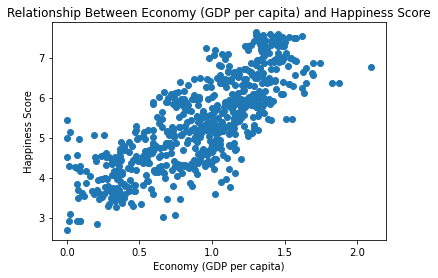

In [ ]:
plt.scatter(economy_arr, happiness_arr)
plt.title("Relationship Between Economy (GDP per capita) and Happiness Score")
plt.xlabel("Economy (GDP per capita)")
plt.ylabel("Happiness Score")
plt.show()

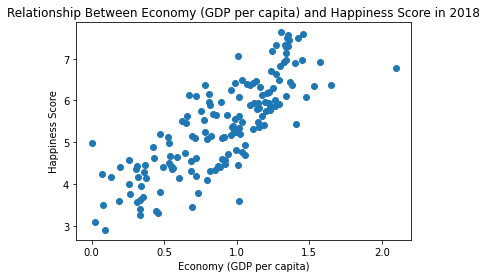

In [ ]:
plt.scatter(economy_arr_2018, happiness_arr_2018)
plt.title("Relationship Between Economy (GDP per capita) and Happiness Score in 2018")
plt.xlabel("Economy (GDP per capita)")
plt.ylabel("Happiness Score")
plt.show()

We plotted scatterplots for visualizing the relationship between economy (GDP per capita) and happiness score for years 2015-2018 and then for only the year of 2018. It is apparent that there is a relatively strong, positive correlation between the two variables, supporting the earlier determined coefficients.

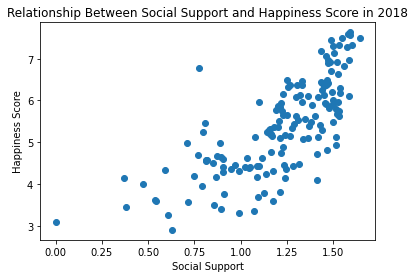

In [ ]:
plt.scatter(social_support_arr, happiness_arr_2018)
plt.title("Relationship Between Social Support and Happiness Score in 2018")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.show()

We plotted a scatterplot for visualizing the relationship between social support and happiness score for the year of 2018. It is apparent that there is a relatively strong, positive correlation betweeen the two variables, but not as strong as the correlation between economy and happiness score, supporting the earlier determined coefficient.

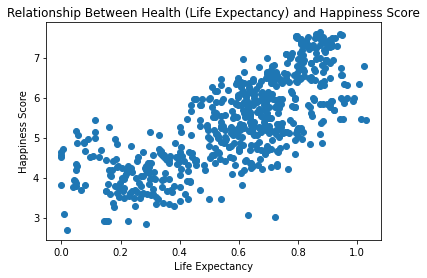

In [ ]:
plt.scatter(health_arr, happiness_arr)
plt.title("Relationship Between Health (Life Expectancy) and Happiness Score")
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Score")
plt.show()

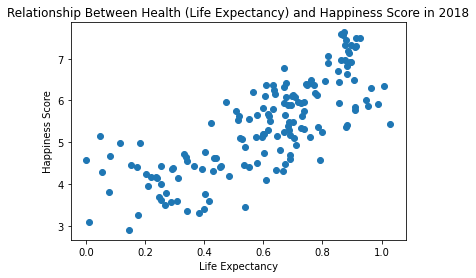

In [ ]:
plt.scatter(health_arr_2018, happiness_arr_2018)
plt.title("Relationship Between Health (Life Expectancy) and Happiness Score in 2018")
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Score")
plt.show()

These two plots between health (life expectancy) and happiness score show strong, positive correlation as well, supporting the earlier determined coefficients.

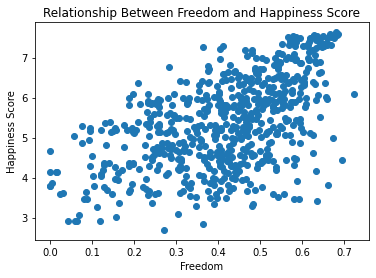

In [ ]:
plt.scatter(freedom_arr, happiness_arr)
plt.title("Relationship Between Freedom and Happiness Score")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.show()

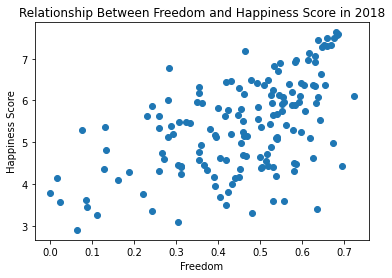

In [ ]:
plt.scatter(freedom_arr_2018, happiness_arr_2018)
plt.title("Relationship Between Freedom and Happiness Score in 2018")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.show()

The scatterplots visualizing the relationship between freedom and happiness score show positive correlation, but relatively weak correlation. This aligns with the earlier determined coefficients.

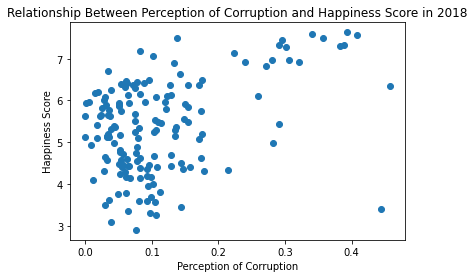

In [ ]:
plt.scatter(corruption_arr, happiness_arr_2018)
plt.title("Relationship Between Perception of Corruption and Happiness Score in 2018")
plt.xlabel("Perception of Corruption")
plt.ylabel("Happiness Score")
plt.show()

The above scatterplot visualizing the relationship between perception of corruption and happiness score shows relatively weak correlation.

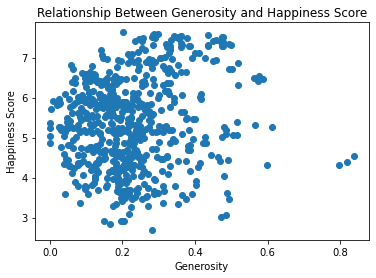

In [ ]:
plt.scatter(generosity_arr, happiness_arr)
plt.title("Relationship Between Generosity and Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

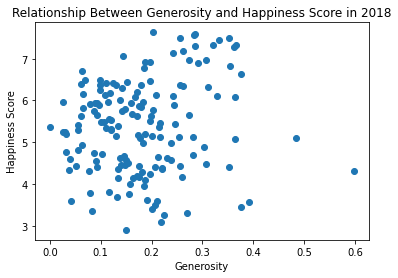

In [ ]:
plt.scatter(generosity_arr_2018, happiness_arr_2018)
plt.title("Relationship Between Generosity and Happiness Score in 2018")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()

The above scatterplots visualizing the relationship between generosity and happiness score show near zero correlation. The two variables are seemingly unrelated to each other.

# Modeling and Question Answering

We've elected to use only the 2018 dataset for the train as from comparing correlation values. The 2018 values mostly represent the 2015-2018 values, despite having a 1:1 ratio between train and test values. Also, a key factor to this decision involved two of the features: social support and perception of corruption are unique to the 2018 dataset.

In [ ]:
#drop overall rank and score

#for some reason interpolating straight off the data works best
train = pd.read_csv('2018.csv').interpolate(method = 'linear', limit_direction='forward') # train = train dataframe with interpolated data for NaN values
train_overall_rank = train['Overall rank']
train_score = train['Score']
train = train.drop(columns=['Overall rank','Score'])
train = train.drop(columns=['Country or region'])


test = pd.read_csv('2019.csv').interpolate(method = 'linear', limit_direction='forward') # test = test dataframe with interpolated data for NaN values
test_overall_rank = test['Overall rank']
test_score = test['Score']
test = test.drop(columns=['Overall rank','Score'])
test = test.drop(columns=['Country or region'])
train

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.305,1.592,0.874,0.681,0.202,0.393
1,1.456,1.582,0.861,0.686,0.286,0.340
2,1.351,1.590,0.868,0.683,0.284,0.408
3,1.343,1.644,0.914,0.677,0.353,0.138
4,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...
151,0.442,1.073,0.343,0.244,0.083,0.064
152,0.455,0.991,0.381,0.481,0.270,0.097
153,0.337,0.608,0.177,0.112,0.224,0.106
154,0.024,0.000,0.010,0.305,0.218,0.038


The 'Overall rank' and 'Score' columns were removed from both the train and test set in order to build a regression model capable of predicting the ranks & scores of 2019, based off of the train DataFrame. These were saved into variables, to train the regressions we used later.(Linear, K-Nearest Neighbors, Random Forest, and one we created ourselves) 

The 'Country or region' was also removed from both train and test, as we wanted to interpolate based off the statistics of a country, not the name of the country.

##Linear Regression

The first machine learning approach we chose to use is a linear regression model. Linear regression works by predicing a dependent variable based on a given independent variable, forming a linear model where the equation can be tweaked based on the slope and intercept of the line. The linear regression algorithm fits multiple lines on a set of data points and returns the line that produces the least error.

In [ ]:
linear_regressor = LinearRegression() # regressor for linear regression
linear_regressor.fit(train, train_score)
linear_coefficients_df = pd.DataFrame(linear_regressor.coef_, train.columns, columns=['Coefficients']) # linear_coefficients_df = dataframe containing coefficients for each feature
linear_coefficients_df

,Coefficients
GDP per capita,1.087139
Social support,1.014156
Healthy life expectancy,0.818309
Freedom to make life choices,1.364131
Generosity,0.570884
Perceptions of corruption,0.711905


As expected, 'GDP per capita', 'Healthy life expectancy' and 'Social support' were among the highest coefficients. Keeping in line with the Pearson correlation coefficients calculated before, these are the features that contributed most to a country's Happiness Score. 'Generosity' also kept in line with expectations from the calculated correlation coefficients, having the lowest coefficient here.

Suprisingly, 'Freedom to make life choices' held the highest coefficient at 1.364131. This can be explained by the data values of that column, however. Because the data values held by that feature are so much lower than other columns like 'GDP per capita' and 'Social support' by nearly half, contributions by 'Freedom to make life choices' requires a higher coefficient in order to match the contributions of other columns. The smaller values combined with its mid-range correlation coefficient create a much higher coefficient than other features.

### Statistics

In [ ]:
# printing statistics for the linear regression model
linear_prediction_table = test_score.to_frame()
linear_prediction_table['Predicted Score'] = linear_regressor.predict(test)

print("Prediction Score: ", linear_regressor.score(test, test_score))
print("Mean Absolute Error: ", mean_absolute_error(test_score, linear_prediction_table['Predicted Score']))
print("Mean Squared Error: ", mean_squared_error(test_score, linear_prediction_table['Predicted Score']))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_score, linear_prediction_table['Predicted Score'])))
total_score = train_score.append(test_score)
print("10% of mean", 0.1 * np.mean(total_score))
linear_prediction_table

Prediction Score:  0.7757473968717049
Mean Absolute Error:  0.42026591331437146
Mean Squared Error:  0.2760758783079983
Root Mean Squared Error 0.5254292324452441
10% of mean 0.5391506410256411


,Score,Predicted Score
0,7.769,6.937533
1,7.600,7.041428
2,7.554,7.167621
3,7.494,6.963427
4,7.488,6.918778
...,...,...
151,3.334,4.671659
152,3.231,4.538701
153,3.203,3.192526
154,3.083,2.464494


The prediction score is around 78%, which means the model is decently accurate. The root mean squared error is only 0.5254292324452441, which is less than 10% of the mean happiness score of the two years, which means the linear regression model is a good predictor model for happiness scores.

##K-Nearest Neighbors Regression

The K-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm, which means it requires labeled input data to generate a model that could be used to predict outputs when given unlabeled input. The KNN algorithm assumes that similar things exist close to each other. Thus, the KNN algorithm computes this similarity value by determining distance between points, Euclidean distance being a common method.

In [ ]:
neigh_regressor = KNeighborsRegressor(n_neighbors=3) # regressor for K-Nearest Neighbors
neigh_regressor.fit(train, train_score)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
neigh_prediction_table = test_score.to_frame()
neigh_prediction_table['Predicted Score'] = neigh_regressor.predict(test)

print("Prediction Score: ", neigh_regressor.score(test, test_score))
print("Mean Absolute Error: ", mean_absolute_error(test_score, neigh_prediction_table['Predicted Score']))
print("Mean Squared Error: ", mean_squared_error(test_score, neigh_prediction_table['Predicted Score']))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_score, neigh_prediction_table['Predicted Score'])))
print("10% of mean", 0.1 * np.mean(total_score))
neigh_prediction_table

Prediction Score:  0.8428777405272463
Mean Absolute Error:  0.34787820512820505
Mean Squared Error:  0.1934321616809116
Root Mean Squared Error 0.4398092332829219
10% of mean 0.5391506410256411


,Score,Predicted Score
0,7.769,7.477667
1,7.600,7.452000
2,7.554,6.935667
3,7.494,7.131333
4,7.488,7.347000
...,...,...
151,3.334,4.086000
152,3.231,4.021000
153,3.203,3.489333
154,3.083,3.741000


The K-nearest neighbors model is even more accurate with a prediction score of 84% accuracy. The root mean squared error is much lower compared to the value calculated from the linear regressor.

##Random Forest Regression

Similar to the KNN algorithm, random forest is a supervised learning algorithm. It builds a "forest" out of a group of decision trees, usually trained with the "bagging" method, which improves stability and accuracy. The algorithm merges these decision trees to generate a prediction. The randomness occurs while generating the trees. The algorithm splits a node at the best feature out of a random subset of features.

In this project, we're using 10 estimators.

In [ ]:
tree_regressor = RandomForestRegressor(n_estimators=10)
tree_regressor.fit(train, train_score)
tree_prediction_table = test_score.to_frame()
tree_prediction_table['Predicted Score'] = tree_regressor.predict(test)

print("Prediction Score: ", tree_regressor.score(test, test_score))
print("Mean Absolute Error: ", mean_absolute_error(test_score, tree_prediction_table['Predicted Score']))
print("Mean Squared Error: ", mean_squared_error(test_score, tree_prediction_table['Predicted Score']))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_score, tree_prediction_table['Predicted Score'])))
print("10% of mean", 0.1 * np.mean(total_score))
tree_prediction_table

Prediction Score:  0.7449167047304706
Mean Absolute Error:  0.4406737179487179
Mean Squared Error:  0.3140313369871794
Root Mean Squared Error 0.560384989973125
10% of mean 0.5391506410256411


,Score,Predicted Score
0,7.769,6.8184
1,7.600,6.8120
2,7.554,6.2986
3,7.494,6.2484
4,7.488,6.6952
...,...,...
151,3.334,4.6157
152,3.231,4.5021
153,3.203,3.7470
154,3.083,3.6653


While the random forest model is not as accurate (prediction accuracy around 78% and root mean squared error of 0.5171610512284275) as the K-nearest neighbors model, it is more accurate than the linear regression model.

## Custom Formula

For the custom formula, despite being the most inaccurate model, we decided to base it off the linear regression model only because the features that contribute the most to happiness score is most visible in the model, mainly due to the coefficients. As such, it is easy to tweak the model to produce more accurate results, either by removing features that seemingly contribute little or placing more emphasis on features that contribute more. We chose to use the four features that seemingly held the most weight in happiness scores: GDP per capita, social support, healthy life expectancy, and freedom.

In [ ]:
custom_cols = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]
train_custom = train[custom_cols]
test_custom = test[custom_cols]

linear_regressor_custom = LinearRegression() # regressor for custom linear regression
linear_regressor_custom.fit(train_custom, train_score)
print("Intercept: ", linear_regressor_custom.intercept_)
linear_coefficients_custom = pd.DataFrame(linear_regressor_custom.coef_, train_custom.columns, columns=['Coefficients'])
linear_coefficients_custom

Intercept:  1.9547135461346277


,Coefficients
GDP per capita,1.105358
Social support,0.961268
Healthy life expectancy,0.859328
Freedom to make life choices,1.663938


In [ ]:
linear_prediction_table_custom = test_score.to_frame()
linear_prediction_table_custom['Predicted Score'] = linear_regressor_custom.predict(test_custom)

print("Prediction Score: ", linear_regressor_custom.score(test_custom, test_score))
print("Mean Absolute Error: ", mean_absolute_error(test_score, linear_prediction_table_custom['Predicted Score']))
print("Mean Squared Error: ", mean_squared_error(test_score, linear_prediction_table_custom['Predicted Score']))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_score, linear_prediction_table_custom['Predicted Score'])))
print("10% of mean", 0.1 * np.mean(total_score))
print("\n")
print("Formula Derived From Linear Regression: Happiness score = 1.105358(GDP per capita) + 0.961268(Social support) + 0.859328(Healthy life expectancy) + 1.663938(Freedom) + 1.9547135461346277")
linear_prediction_table_custom

Prediction Score:  0.7674330197796623
Mean Absolute Error:  0.43251935424203736
Mean Squared Error:  0.2863116522800686
Root Mean Squared Error 0.5350809773109755
10% of mean 0.5391506410256411


Formula Derived From Linear Regression: Happiness score = 1.105358(GDP per capita) + 0.961268(Social support) + 0.859328(Healthy life expectancy) + 1.663938(Freedom) + 1.9547135461346277


,Score,Predicted Score
0,7.769,6.800430
1,7.600,6.836441
2,7.554,7.006957
3,7.494,6.906265
4,7.488,6.746126
...,...,...
151,3.334,4.486112
152,3.231,4.454253
153,3.203,3.148782
154,3.083,2.448068


After performing a variation of the previous linear regression on the four features we found to be the most vital for happiness, we realized removing the other two features completely actually produced slighly more error. Despite the higher error, the model is still fairly accurate with about 77% prediction accuracy and a root mean squared error that is less than 10% of the mean. The formula we invented makes use of the coefficients and intercept of the linear regression model: 

Happiness score = 1.105358(GDP per capita) + 0.961268(Social support) + 0.859328(Healthy life expectancy) + 1.663938(Freedom) + 1.9547135461346277

##Analysis

K-Nearest Neighbors regression proved to be the most accurate and the best regression, having the highest Prediction score, the lowest mean absolute error, mean squared error, and Root MSE. Random Forest regression and Linear Regression were very close in their performance, with Random Forest slightly edging out the Linear Regression in accuracy.